# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob
from tqdm import tqdm

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


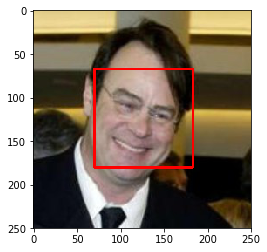

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

Face detected in human files probability: 98%

Face detected in dog files probability: 17%

In [60]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
h = 0.0
d = 0.0
len_human = len(human_files_short)
len_dog = len(dog_files_short)

for human in tqdm(human_files_short):
    if face_detector(human):
        h += 1

for dog in tqdm(dog_files_short):
    if face_detector(dog):
        d += 1
human_percentage = (h / len_human) * 100     
dog_percentage = (d / len_dog) * 100
print('Face detected in human files probability: {}%\nFace detected in dog files probability: {}%'.format(human_percentage, dog_percentage))


100%|██████████| 100/100 [00:29<00:00,  3.44it/s]

Face detected in human files probability: 98.0%
Face detected in dog files probability: 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    print('Cuda available: {}'.format(use_cuda))

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 102120383.28it/s]


Cuda available: True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()])
    img = transform(img)
    img = torch.unsqueeze(img, 0)
    if use_cuda:
        img = img.cuda()
    output = VGG16(img)
    
    _, index = torch.max(output, 1)
    
    return index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [6]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    if use_cuda:
        VGG16.cuda()
    prediction = VGG16_predict(img_path)
    
    if prediction in range(151, 269):
        return True
    
    return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Humans detected: 0%

Dogs detected: 93%

In [69]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dogs = 0.0
humans = 0.0

for img in tqdm(human_files_short):
    if dog_detector(img):
        humans += 1
        
for img in tqdm(dog_files_short):
    if dog_detector(img):
        dogs += 1
        
dogs_percentage = (dogs / len(dog_files_short)) * 100
humans_percentage = (humans / len(human_files_short)) * 100
print('Humans detected: {}\nDogs detected: {}'.format(humans_percentage,dogs_percentage))
    

100%|██████████| 100/100 [00:04<00:00, 24.03it/s]

Humans detected: 0.0
Dogs detected: 93.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [7]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20

train_path = "/data/dog_images/train"
valid_path = "/data/dog_images/valid"
test_path = "/data/dog_images/test"


# convert train data to a normalized torch.FloatTensor
train_transform = transforms.Compose([
    transforms.Resize(size=225),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(), 
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# convert test/valid data to a normalized torch.FloatTensor
test_transform = transforms.Compose([
    transforms.Resize(size=225),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# transform the data
train_data = datasets.ImageFolder(train_path, transform=train_transform)
valid_data = datasets.ImageFolder(valid_path, transform=test_transform)
test_data = datasets.ImageFolder(test_path, transform=test_transform)

# load the data
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

# set up the loaders
loaders_scratch = {
    'train' : train_loader,
    'test' : test_loader,
    'valid' : valid_loader
}



**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

Images are resized to 225x225px and center cropped to 224x224px. 
Images are augmented with random horizontal flip and random rotation by 10 degree. Then data are normalized.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [8]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # input layer -> 224x224x3
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2,  padding=1)
        # input layer -> 56x56x32
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        # input layer -> 14x14x64
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        
        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Linear layers
        self.fc1 = nn.Linear(7 * 7 * 128, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 133)
        
        # Dropout layer
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 7 * 7 * 128)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
model_scratch

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I started with 5 convolutional layers and 3 fully connected layers. It was an overkill and took too long to train so I started to reduce layers and depth of convolutional layers. I ended up with 3 convolutional layers and depth 128, and 3 fully connected layers, which worked well enough for this case.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [9]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [52]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in tqdm(enumerate(loaders['train'])):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()*data.size(0)
            
        train_loss = train_loss / len(train_loader.sampler)
        valid_loss = valid_loss / len(valid_loader.sampler)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased: {:.6f} --> {:.6f}. Model saved.'.format(
            valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

334it [01:47,  3.09it/s]
0it [00:00, ?it/s]

Epoch: 1 	Training Loss: 4.870971 	Validation Loss: 4.763593
Validation loss decreased: inf --> 4.763593. Model saved.


334it [01:30,  3.62it/s]
0it [00:00, ?it/s]

Epoch: 2 	Training Loss: 4.689372 	Validation Loss: 4.582028
Validation loss decreased: 4.763593 --> 4.582028. Model saved.


334it [01:29,  3.76it/s]
0it [00:00, ?it/s]

Epoch: 3 	Training Loss: 4.512129 	Validation Loss: 4.395052
Validation loss decreased: 4.582028 --> 4.395052. Model saved.


334it [01:29,  3.89it/s]
0it [00:00, ?it/s]

Epoch: 4 	Training Loss: 4.348163 	Validation Loss: 4.292141
Validation loss decreased: 4.395052 --> 4.292141. Model saved.


334it [01:29,  3.61it/s]
0it [00:00, ?it/s]

Epoch: 5 	Training Loss: 4.219932 	Validation Loss: 4.277568
Validation loss decreased: 4.292141 --> 4.277568. Model saved.


334it [01:29,  3.96it/s]
0it [00:00, ?it/s]

Epoch: 6 	Training Loss: 4.099084 	Validation Loss: 4.112987
Validation loss decreased: 4.277568 --> 4.112987. Model saved.


334it [01:28,  4.34it/s]
0it [00:00, ?it/s]

Epoch: 7 	Training Loss: 3.979744 	Validation Loss: 4.042485
Validation loss decreased: 4.112987 --> 4.042485. Model saved.


334it [01:29,  2.73it/s]
0it [00:00, ?it/s]

Epoch: 8 	Training Loss: 3.849006 	Validation Loss: 4.052909


334it [01:29,  3.53it/s]
0it [00:00, ?it/s]

Epoch: 9 	Training Loss: 3.719632 	Validation Loss: 3.830542
Validation loss decreased: 4.042485 --> 3.830542. Model saved.


334it [01:30,  4.36it/s]
1it [00:00,  5.21it/s]

Epoch: 10 	Training Loss: 3.604331 	Validation Loss: 4.057892


334it [01:30,  3.92it/s]
0it [00:00, ?it/s]

Epoch: 11 	Training Loss: 3.481671 	Validation Loss: 3.753953
Validation loss decreased: 3.830542 --> 3.753953. Model saved.


334it [01:30,  3.01it/s]
1it [00:00,  5.71it/s]

Epoch: 12 	Training Loss: 3.311394 	Validation Loss: 3.783579


334it [01:30,  3.62it/s]
1it [00:00,  5.18it/s]

Epoch: 13 	Training Loss: 3.176588 	Validation Loss: 3.797099


334it [01:30,  3.95it/s]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 3.011070 	Validation Loss: 3.719632
Validation loss decreased: 3.753953 --> 3.719632. Model saved.


334it [01:30,  4.01it/s]
0it [00:00, ?it/s]

Epoch: 15 	Training Loss: 2.886306 	Validation Loss: 3.645735
Validation loss decreased: 3.719632 --> 3.645735. Model saved.


334it [01:30,  3.57it/s]
0it [00:00, ?it/s]

Epoch: 16 	Training Loss: 2.746678 	Validation Loss: 3.643045
Validation loss decreased: 3.645735 --> 3.643045. Model saved.


334it [01:29,  4.12it/s]
0it [00:00, ?it/s]

Epoch: 17 	Training Loss: 2.614893 	Validation Loss: 3.856866


334it [01:30,  4.05it/s]
0it [00:00, ?it/s]

Epoch: 18 	Training Loss: 2.543114 	Validation Loss: 3.957437


334it [01:29,  4.29it/s]
0it [00:00, ?it/s]

Epoch: 19 	Training Loss: 2.397538 	Validation Loss: 3.796750


334it [01:29,  3.62it/s]
0it [00:00, ?it/s]

Epoch: 20 	Training Loss: 2.310421 	Validation Loss: 3.793890


334it [01:29,  4.37it/s]
0it [00:00, ?it/s]

Epoch: 21 	Training Loss: 2.198503 	Validation Loss: 3.949839


334it [01:28,  4.67it/s]
0it [00:00, ?it/s]

Epoch: 22 	Training Loss: 2.164459 	Validation Loss: 3.979311


334it [01:28,  4.55it/s]
1it [00:00,  5.17it/s]

Epoch: 23 	Training Loss: 2.076794 	Validation Loss: 4.074543


334it [01:29,  4.03it/s]
1it [00:00,  5.24it/s]

Epoch: 24 	Training Loss: 2.043620 	Validation Loss: 4.162513


334it [01:28,  3.17it/s]
1it [00:00,  5.60it/s]

Epoch: 25 	Training Loss: 1.931388 	Validation Loss: 4.201138


334it [01:28,  4.07it/s]
0it [00:00, ?it/s]

Epoch: 26 	Training Loss: 1.989273 	Validation Loss: 4.156913


334it [01:30,  4.32it/s]
0it [00:00, ?it/s]

Epoch: 27 	Training Loss: 1.904145 	Validation Loss: 4.071683


334it [01:31,  3.73it/s]
0it [00:00, ?it/s]

Epoch: 28 	Training Loss: 1.929801 	Validation Loss: 4.188035


334it [01:30,  4.63it/s]
1it [00:00,  5.06it/s]

Epoch: 29 	Training Loss: 1.964948 	Validation Loss: 4.263297


334it [01:30,  2.49it/s]
0it [00:00, ?it/s]

Epoch: 30 	Training Loss: 1.985249 	Validation Loss: 4.254014


334it [01:29,  4.35it/s]
0it [00:00, ?it/s]

Epoch: 31 	Training Loss: 1.945246 	Validation Loss: 4.415824


334it [01:28,  3.48it/s]
0it [00:00, ?it/s]

Epoch: 32 	Training Loss: 1.874297 	Validation Loss: 4.245612


334it [01:28,  3.31it/s]
0it [00:00, ?it/s]

Epoch: 33 	Training Loss: 1.985416 	Validation Loss: 4.668386


334it [01:28,  4.95it/s]
0it [00:00, ?it/s]

Epoch: 34 	Training Loss: 2.013237 	Validation Loss: 4.393832


334it [01:27,  3.42it/s]
0it [00:00, ?it/s]

Epoch: 35 	Training Loss: 1.946814 	Validation Loss: 4.644852


334it [01:27,  4.03it/s]
1it [00:00,  5.40it/s]

Epoch: 36 	Training Loss: 2.541360 	Validation Loss: 4.394697


334it [01:28,  4.11it/s]
0it [00:00, ?it/s]

Epoch: 37 	Training Loss: 2.316148 	Validation Loss: 4.415606


334it [01:29,  2.97it/s]
0it [00:00, ?it/s]

Epoch: 38 	Training Loss: 2.213282 	Validation Loss: 5.520910


334it [01:30,  2.94it/s]
0it [00:00, ?it/s]

Epoch: 39 	Training Loss: 2.252290 	Validation Loss: 4.379581


334it [01:30,  4.10it/s]
1it [00:00,  5.73it/s]

Epoch: 40 	Training Loss: 2.213972 	Validation Loss: 4.488803


334it [01:29,  3.94it/s]
0it [00:00, ?it/s]

Epoch: 41 	Training Loss: 2.257002 	Validation Loss: 4.608467


334it [01:29,  2.84it/s]
0it [00:00, ?it/s]

Epoch: 42 	Training Loss: 2.421824 	Validation Loss: 4.529756


334it [01:29,  3.77it/s]
0it [00:00, ?it/s]

Epoch: 43 	Training Loss: 2.365033 	Validation Loss: 4.454276


334it [01:28,  3.78it/s]
0it [00:00, ?it/s]

Epoch: 44 	Training Loss: 2.310928 	Validation Loss: 4.552708


334it [01:29,  3.67it/s]
1it [00:00,  5.32it/s]

Epoch: 45 	Training Loss: 2.391463 	Validation Loss: 4.934131


334it [01:29,  3.49it/s]
0it [00:00, ?it/s]

Epoch: 46 	Training Loss: 2.575920 	Validation Loss: 4.646511


334it [01:28,  3.17it/s]
0it [00:00, ?it/s]

Epoch: 47 	Training Loss: 2.442176 	Validation Loss: 4.652082


334it [01:29,  4.86it/s]
0it [00:00, ?it/s]

Epoch: 48 	Training Loss: 2.488971 	Validation Loss: 4.887294


334it [01:29,  2.94it/s]
0it [00:00, ?it/s]

Epoch: 49 	Training Loss: 2.399916 	Validation Loss: 5.173789


334it [01:28,  3.83it/s]


Epoch: 50 	Training Loss: 2.506602 	Validation Loss: 4.939815


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [55]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in tqdm(enumerate(loaders['test'])):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

42it [00:11,  3.47it/s]

Test Loss: 3.712423

Test Accuracy: 16% (134/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [10]:
## TODO: Specify data loaders

train_path_transfer = "/data/dog_images/train"
valid_path_transfer = "/data/dog_images/valid"
test_path_transfer = "/data/dog_images/test"

data_transform = transforms.Compose([transforms.CenterCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


data_transform_test = transforms.Compose([transforms.Resize(225),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

train_data_t = datasets.ImageFolder(train_path_transfer, transform=data_transform)
valid_data_t = datasets.ImageFolder(valid_path_transfer, transform=data_transform_test)
test_data_t = datasets.ImageFolder(test_path_transfer, transform=data_transform_test)


train_loader_t = torch.utils.data.DataLoader(train_data_t, batch_size=batch_size, shuffle=True)
valid_loader_t = torch.utils.data.DataLoader(valid_data_t, batch_size=batch_size, shuffle=True)
test_loader_t = torch.utils.data.DataLoader(test_data_t, batch_size=batch_size, shuffle=True)

loaders_transfer = {
    'train' : train_loader_t,
    'test' : test_loader_t,
    'valid' : valid_loader_t
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [11]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False
    

use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()
    print('Cuda available.')
    
model_transfer

Cuda available.


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [12]:
fc = nn.Linear(4096, 133)
model_transfer.classifier[6] = fc

for param in model_transfer.classifier.parameters():
    param.requires_grad = True
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I started with DenseNet, didn't get a good results so I tried VGGNet because it is very good in extracting features from the images. Model trained much faster and even lower number of epochs gave me better results.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [13]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [36]:
# train the model
model_transfer = train(30, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

334it [03:32,  1.55it/s]


Epoch: 1 	Training Loss: 4.645867 	Validation Loss: 3.874812
Validation loss decreased: inf --> 3.874812. Model saved.


334it [03:31,  1.74it/s]


Epoch: 2 	Training Loss: 3.848192 	Validation Loss: 2.612844
Validation loss decreased: 3.874812 --> 2.612844. Model saved.


334it [03:30,  1.50it/s]


Epoch: 3 	Training Loss: 3.071187 	Validation Loss: 1.709277
Validation loss decreased: 2.612844 --> 1.709277. Model saved.


334it [03:31,  1.57it/s]


Epoch: 4 	Training Loss: 2.585541 	Validation Loss: 1.275379
Validation loss decreased: 1.709277 --> 1.275379. Model saved.


334it [03:32,  1.56it/s]


Epoch: 5 	Training Loss: 2.325241 	Validation Loss: 1.079444
Validation loss decreased: 1.275379 --> 1.079444. Model saved.


334it [03:31,  1.74it/s]


Epoch: 6 	Training Loss: 2.111183 	Validation Loss: 0.948522
Validation loss decreased: 1.079444 --> 0.948522. Model saved.


334it [03:32,  1.49it/s]


Epoch: 7 	Training Loss: 1.988119 	Validation Loss: 0.874500
Validation loss decreased: 0.948522 --> 0.874500. Model saved.


334it [03:31,  1.58it/s]


Epoch: 8 	Training Loss: 1.895985 	Validation Loss: 0.827323
Validation loss decreased: 0.874500 --> 0.827323. Model saved.


334it [03:31,  1.61it/s]


Epoch: 9 	Training Loss: 1.825381 	Validation Loss: 0.787009
Validation loss decreased: 0.827323 --> 0.787009. Model saved.


334it [03:28,  1.53it/s]


Epoch: 10 	Training Loss: 1.738273 	Validation Loss: 0.752010
Validation loss decreased: 0.787009 --> 0.752010. Model saved.


334it [03:29,  1.56it/s]


Epoch: 11 	Training Loss: 1.691298 	Validation Loss: 0.735350
Validation loss decreased: 0.752010 --> 0.735350. Model saved.


334it [03:31,  1.59it/s]


Epoch: 12 	Training Loss: 1.631138 	Validation Loss: 0.704214
Validation loss decreased: 0.735350 --> 0.704214. Model saved.


334it [03:31,  1.54it/s]


Epoch: 13 	Training Loss: 1.600178 	Validation Loss: 0.696148
Validation loss decreased: 0.704214 --> 0.696148. Model saved.


334it [03:31,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 14 	Training Loss: 1.551985 	Validation Loss: 0.699073


334it [03:32,  1.62it/s]


Epoch: 15 	Training Loss: 1.533131 	Validation Loss: 0.686915
Validation loss decreased: 0.696148 --> 0.686915. Model saved.


334it [03:30,  1.64it/s]


Epoch: 16 	Training Loss: 1.495067 	Validation Loss: 0.650053
Validation loss decreased: 0.686915 --> 0.650053. Model saved.


334it [03:30,  1.70it/s]
0it [00:00, ?it/s]

Epoch: 17 	Training Loss: 1.457545 	Validation Loss: 0.652698


334it [03:31,  1.50it/s]


Epoch: 18 	Training Loss: 1.445644 	Validation Loss: 0.638161
Validation loss decreased: 0.650053 --> 0.638161. Model saved.


334it [03:32,  1.49it/s]
0it [00:00, ?it/s]

Epoch: 19 	Training Loss: 1.405404 	Validation Loss: 0.644087


334it [03:32,  1.60it/s]


Epoch: 20 	Training Loss: 1.405017 	Validation Loss: 0.631739
Validation loss decreased: 0.638161 --> 0.631739. Model saved.


334it [03:32,  1.44it/s]
0it [00:00, ?it/s]

Epoch: 21 	Training Loss: 1.353046 	Validation Loss: 0.648710


334it [03:32,  1.51it/s]


Epoch: 22 	Training Loss: 1.340682 	Validation Loss: 0.625309
Validation loss decreased: 0.631739 --> 0.625309. Model saved.


334it [03:32,  1.54it/s]


Epoch: 23 	Training Loss: 1.299419 	Validation Loss: 0.613901
Validation loss decreased: 0.625309 --> 0.613901. Model saved.


334it [03:33,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 24 	Training Loss: 1.314084 	Validation Loss: 0.622839


334it [03:32,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 25 	Training Loss: 1.286864 	Validation Loss: 0.622449


334it [03:32,  1.55it/s]
0it [00:00, ?it/s]

Epoch: 26 	Training Loss: 1.275018 	Validation Loss: 0.622597


334it [03:32,  1.69it/s]


Epoch: 27 	Training Loss: 1.258185 	Validation Loss: 0.601176
Validation loss decreased: 0.613901 --> 0.601176. Model saved.


334it [03:32,  1.59it/s]
0it [00:00, ?it/s]

Epoch: 28 	Training Loss: 1.244403 	Validation Loss: 0.618306


334it [03:31,  1.47it/s]
0it [00:00, ?it/s]

Epoch: 29 	Training Loss: 1.212416 	Validation Loss: 0.610708


334it [03:32,  1.61it/s]


Epoch: 30 	Training Loss: 1.206643 	Validation Loss: 0.618655


In [14]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [41]:
model_transfer.cuda()
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

42it [00:27,  1.61it/s]

Test Loss: 0.625629

Test Accuracy: 80% (671/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [18]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()])
    img = transform(img)
    if use_cuda:
        model_transfer.cuda()
        img = img.cuda()
    img = torch.unsqueeze(img, 0)
    output = model_transfer(img)
    _, index = torch.max(output, 1)
    
    return class_names[index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [16]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if face_detector(img_path):
        #Human face detected
        human = predict_breed_transfer(img_path)
        return print('Found human. You look like a {}'.format(human))
    elif dog_detector(img_path):
        #Dog detected
        dog_breed = predict_breed_transfer(img_path)
        return print('Found dog. Your breed is a {}'.format(dog_breed))
    else:
        print('No human or dog detected.')
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

1. Output is unstable. It works as well if the pictures are similar to the training set. Otherwise pictures aren't getting recognized correctly. This can be solved with more diverse training set.
2. Cat was recognized as human I think because of the face_detector. For better results I would try to make a face detector better.
3. There is no way how to handle human and a dog in one picture. I would also try to improve it.
4. If person's face is smaller on the picture, algorith has an issue to detect human. I would improve it with a function detect_human where I would look for a human body, not just a face.

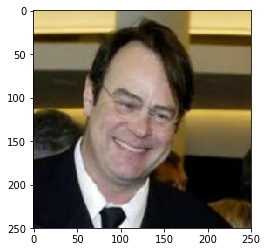

Found human. You look like a Chinese crested


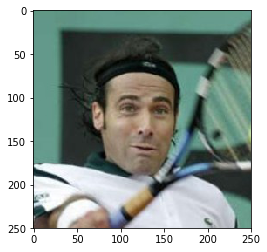

Found human. You look like a Bearded collie


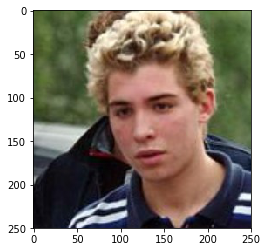

Found human. You look like a Chinese crested


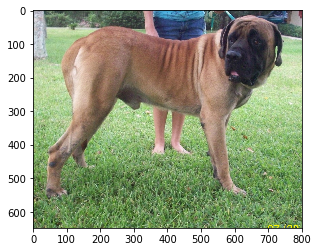

Found dog. Your breed is a Mastiff


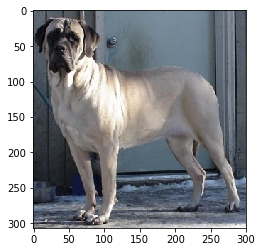

Found dog. Your breed is a Mastiff


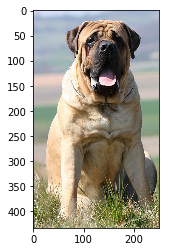

Found dog. Your breed is a Bulldog


In [19]:
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

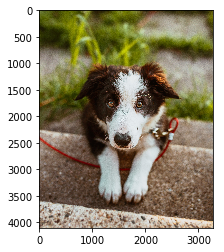

Found dog. Your breed is a Border collie


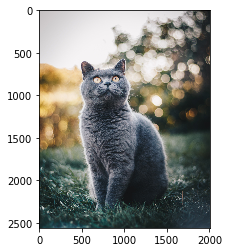

Found human. You look like a Canaan dog


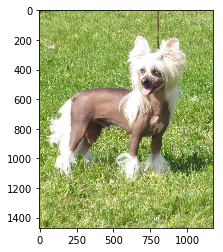

Found dog. Your breed is a Chinese crested


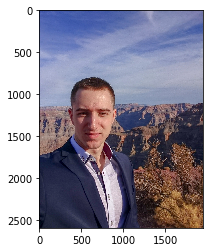

Found human. You look like a Chinese crested


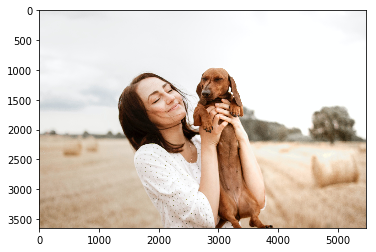

Found human. You look like a American foxhound


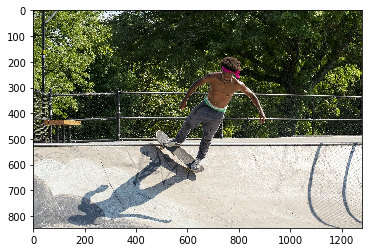

No human or dog detected.


In [20]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
myImg = np.array(glob("my_images/*"))

for img in myImg:
    run_app(img)